# Espetro de Matrices Aleatorias 2

## Girko Circular law (ver clase 3)
Sea A una matriz nxn con entradas independientes con distribucion normal standard y sea B=A/sqrt(n). Realice un plot de los valores propios

In [8]:
using Interact

In [5]:
using Winston


Use "AbstractVecOrMat{T}(" instead.


Considerar k matrices aleatorias (i.i.d. independientes y gaussianas) de tamaño nxn y realizar un gráfico de los valores propios complejos.

In [4]:
n=100; k=50

50

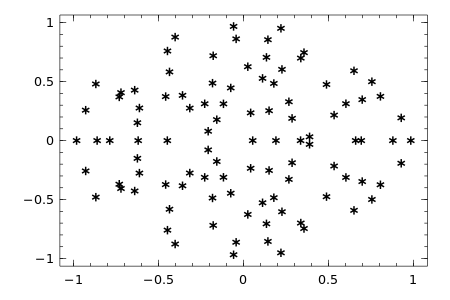

In [5]:
n=100
A=randn(n,n)
A=1/sqrt(n) *A
V=eigvals(A)
E=Array{Float64}(n,2)
E[:,1]=real(V)
E[:,2]=imag(V)
plot(E[:,1],E[:,2],"*")

Interact.Slider{Int64}(Signal{Int64}(20, nactions=0),"k",20,10:30,true)

Interact.Slider{Int64}(Signal{Int64}(550, nactions=0),"n",550,100:1000,true)

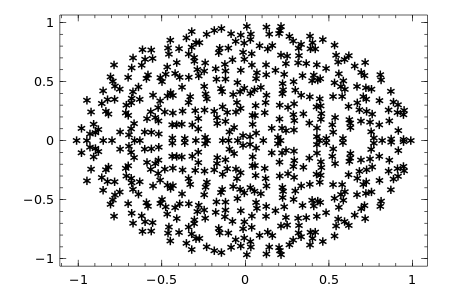

In [6]:
@manipulate for k=10:30, n=100:1000
    A=randn(n,n)
    A=1/sqrt(n)*A
V=eigvals(A)
E=Array{Float64}(n,2)
E[:,1]=real(V)
E[:,2]=imag(V)
plot(E[:,1],E[:,2],"*")
end

Hagamos lo mismo pero para uniformes independientes

Interact.Slider{Int64}(Signal{Int64}(20, nactions=0),"k",20,10:30,true)

Interact.Slider{Int64}(Signal{Int64}(550, nactions=0),"n",550,100:1000,true)

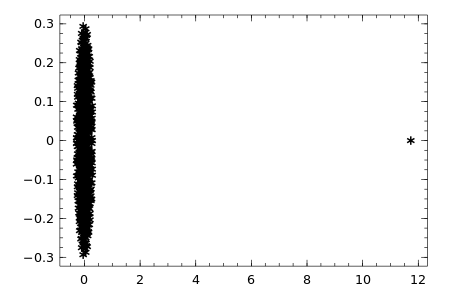

In [17]:
@manipulate for k=10:30, n=100:1000
    A=1/sqrt(n)*rand(n,n)
V=eigvals(A)
E=Array{Float64}(n,2)
    E[:,1]=real(V)
    E[:,2]=imag(V)
    plot(E[:,1],E[:,2],"*")
end

Interact.Slider{Int64}(Signal{Int64}(20, nactions=0),"k",20,10:30,true)

Interact.Slider{Int64}(Signal{Int64}(550, nactions=0),"n",550,100:1000,true)

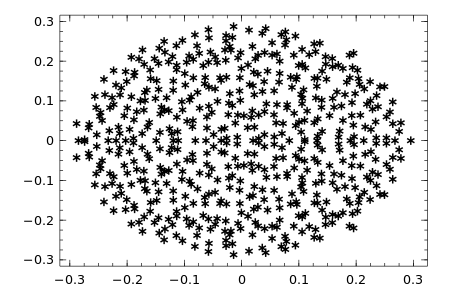

In [18]:
@manipulate for k=10:30, n=100:1000
    A=1/sqrt(n)*rand(n,n)
V=eigvals(A)
E=Array{Float64}(n-1,2)
    E[:,1]=real(V)[2:n]
    E[:,2]=imag(V)[2:n]
plot(E[:,1],E[:,2],"*")
end

# Álgebra Lineal

In [58]:
A=2*eye(3,3)

3x3 Array{Float64,2}:
 2.0  0.0  0.0
 0.0  2.0  0.0
 0.0  0.0  2.0

In [59]:
b=[1,2,3]

3-element Array{Int64,1}:
 1
 2
 3

In [60]:
A\b

3-element Array{Float64,1}:
 0.5
 1.0
 1.5

## Estabilidad y condicionamiento

 ### Escribir un programa que resuelva el siguiente sistema lineal:
 $$\begin{pmatrix} 1 &1 \\ 1 & 1+\varepsilon \end{pmatrix} \begin{pmatrix}x \\y \end{pmatrix}
 =\begin{pmatrix} 2\\ 2+\varepsilon\end{pmatrix}$$
 para diferentes valres de $\varepsilon$.
 
 #### Cuál es mínimo valor de $\varepsilon$ para que sus soluciones sean correctas?
 
 #### Hallar el número de condición dependiendo de $\varepsilon$ 
 __cond(A)__

In [20]:
epsilon=0.01;
A=[1 1 ; 1 1+epsilon]

2x2 Array{Float64,2}:
 1.0  1.0 
 1.0  1.01

In [29]:
@manipulate for k in 100:1000000000
    A=[1 1; 1 1+1/k]
    b=[2, 2+1/k]
    #A\b-[1,1]
    cond(A)
    end  

    

Interact.Slider{Int64}(Signal{Int64}(500000050, nactions=0),"k",500000050,100:1000000000,true)

2.0000002131855502e9

In [26]:
@manipulate for k in 100:1000000000
    A=[1 0; 0 1+1/k]
    b=[1, 1+1/k]
    A\b-[1,1]
end 

Interact.Slider{Int64}(Signal{Int64}(500000050, nactions=0),"k",500000050,100:1000000000,true)

2-element Array{Float64,1}:
 0.0
 0.0

## Raíces de polinomios

In [30]:
Pkg.add("Roots")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Roots
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [32]:
using Roots

INFO: Recompiling stale cache file /home/diego/.julia/lib/v0.4/Roots.ji for module Roots.
INFO: Recompiling stale cache file /home/diego/.julia/lib/v0.4/Polynomials.ji for module Polynomials.
INFO: Recompiling stale cache file /home/diego/.julia/lib/v0.4/ForwardDiff.ji for module ForwardDiff.
INFO: Recompiling stale cache file /home/diego/.julia/lib/v0.4/Calculus.ji for module Calculus.


In [33]:
f(x) = exp(x) - x^4
## bracketing
fzero(f, [8, 9])        # 8.613169456441398
fzero(f, -10, 0)        # -0.8155534188089606
fzeros(f, -10, 10)      # -0.815553, 1.42961  and 8.6131

3-element Array{Float64,1}:
 -0.815553
  1.42961 
  8.61317 

### Cómo tirar uniformes en un conjunto? Hagamos el ejemplo del disco

Interact.Slider{Int64}(Signal{Int64}(5025, nactions=0),"n",5025,50:10000,true)

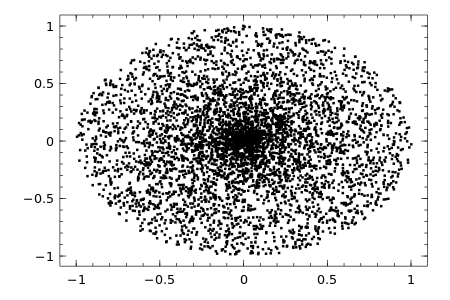

In [13]:
@manipulate for n=50:10000
    rho=rand(n)
    tita=2*pi*rand(n)
    R=rho.*cos(tita)
    I=rho.*sin(tita)
    plot(R,I,".")
end

## ups tiene núcleo

# vamos de vuelta....

Interact.Slider{Int64}(Signal{Int64}(525, nactions=0),"n",525,50:1000,true)

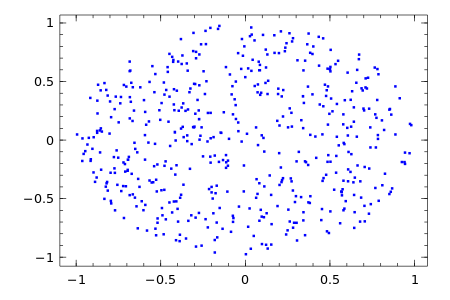

In [11]:
@manipulate for n=50:1000
    rho=sqrt(rand(n))
    tita=2*pi*rand(n)
    R=rho.*cos(tita)
    I=rho.*sin(tita)
   plot(R,I,".blue")
end

Interact.Slider{Int64}(Signal{Int64}(525, nactions=0),"n",525,50:1000,true)

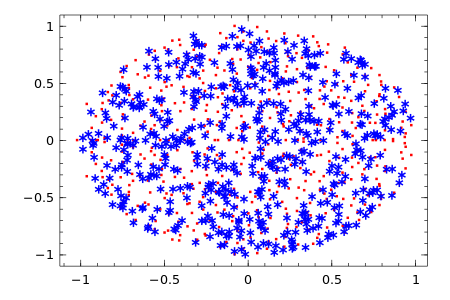

In [19]:
@manipulate for n=50:1000
    rho=sqrt(rand(n))
    tita=2*pi*rand(n)
    R=rho.*cos(tita)
    I=rho.*sin(tita)
    A=randn(n,n)
    A=1/sqrt(n)*A
    V=eigvals(A)
    E=Array{Float64}(n,2)
    E[:,1]=real(V)
    E[:,2]=imag(V)
    plot(E[:,1],E[:,2],".green")  
    oplot(R,I,"*blue")
end

In [7]:
 rho=sqrt(rand(n)/pi)
    tita=2*pi*rand(n)
    R=rho.*cos(tita)
    I=rho.*sin(tita)
    A=randn(n,n)
    A=1/sqrt(n)*A
    V=eigvals(A)
    E=Array{Float64}(n,2)
    E[:,1]=real(V)
    E[:,2]=imag(V)
    plot(E[:,1],E[:,2],".red")  
plot(R,I,".blue")

LoadError: LoadError: UndefVarError: subplot not defined
while loading In[7], in expression starting on line 12

In [15]:
sqrt(a)

2-element Array{Float64,1}:
 1.0    
 1.41421

In [16]:
a/pi

2-element Array{Float64,1}:
 0.31831
 0.63662

search: figure



No documentation found.

`Winston.figure` is a generic `Function`.

```julia
# 2 methods for generic function "figure":
figure() at /home/diego/.julia/v0.4/Winston/src/Winston.jl:2819
figure(i::Integer) at /home/diego/.julia/v0.4/Winston/src/Winston.jl:2826
```


In [1]:
n=5

5

In [2]:
rho=sqrt(rand(n)/pi)
tita=2*pi*rand(n)
R=rho.*cos(tita)
I=rho.*sin(tita)


5-element Array{Float64,1}:
 -0.193417 
 -0.400474 
  0.452586 
  0.0961516
 -0.0538371

In [3]:
A=randn(n,n)
A=1/sqrt(n)*A
#V=eigvals(A)
    

5x5 Array{Float64,2}:
  0.379871   -0.843803    0.466267   -0.161215  -0.478527
  0.306939    0.258677    0.390032    0.198857   0.679811
  0.243561    0.274932    0.0986551   0.449394  -0.428324
  0.0312582   0.0315018  -0.113734   -0.47871   -0.932527
 -0.565714    0.639628    0.180693   -0.07083    0.693267

In [4]:
eigvals(A)

5-element Array{Complex{Float64},1}:
 -0.730075+0.0im     
 -0.175871+0.498062im
 -0.175871-0.498062im
   1.01679+0.108442im
   1.01679-0.108442im